In [1]:
# Notebook: Venn
# Description: Notebook contains analysis of overlapping DMPs between study groups.

In [2]:
%load_ext lab_black

In [3]:
import pandas as pd

from venn import venn
import matplotlib

In [4]:
def extract(df, threshold=0.1, alpha=0.05):
    """Function to extract CpGs from report"""
    df = df[(df["Delta mean"].abs() > threshold) & (df["q-value"] <= alpha)]
    return set(df.index)

In [5]:
# Load all tested probes per group

In [6]:
usa = pd.read_csv("output/USACoV_vs_HB_ALLProbes.csv", index_col=0)
pl = pd.read_csv("output/PLCoV_vs_HB_ALLProbes.csv", index_col=0)
spain = pd.read_csv("output/SpainCoV_vs_HB_ALLProbes.csv", index_col=0)

In [7]:
# Extract DMPs

In [8]:
usa = extract(usa)
pl = extract(pl)
spain = extract(spain)

In [9]:
len(usa), len(pl), len(spain)

(139, 4728, 1251)

In [10]:
len(usa), len(pl), len(spain)

(139, 4728, 1251)

In [11]:
# Venn: all DMPs between groups

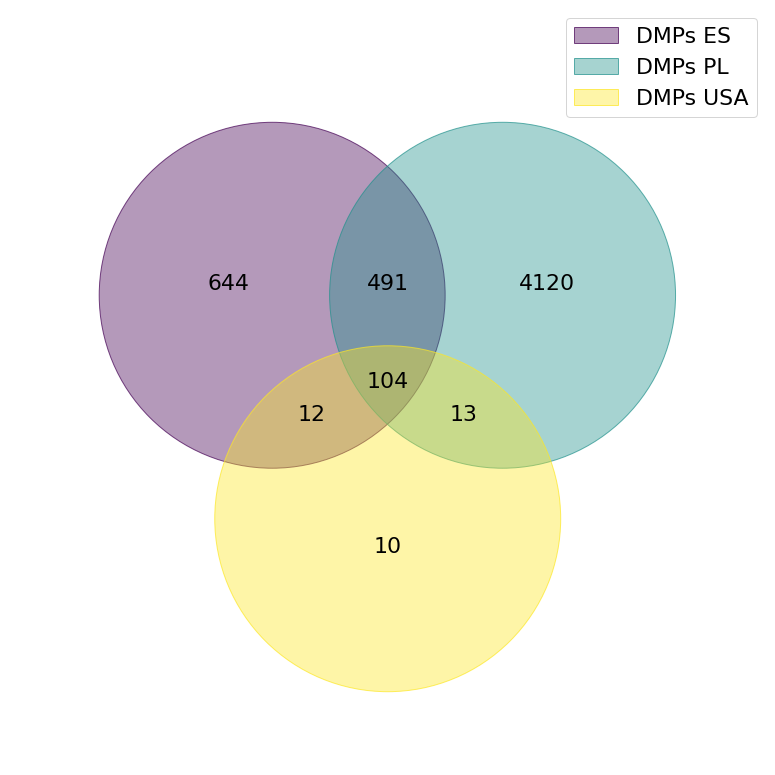

In [12]:
fig = venn(
    {
        "DMPs ES": spain,
        "DMPs PL": pl,
        "DMPs USA": usa,
    },
    figsize=(14, 14),
    fontsize=22,
)

fig.figure.savefig("../Plots/VennAllCoVGroups.jpg")

In [13]:
# Export overlapped DMPs into file

intersection = set.intersection(pl, spain, usa)
intersection = pd.DataFrame(intersection, columns=["CpG"]).to_csv(
    "../Files/DMPsInAllCoVGroup"
)

In [14]:
# Extend the analysis by new group: non-COVID-19

In [22]:
report = set(extract(pd.read_csv("output/USANoNCoV_vs_HB_ALLProbes.csv", index_col=0)))
len(report)

144

<AxesSubplot:>

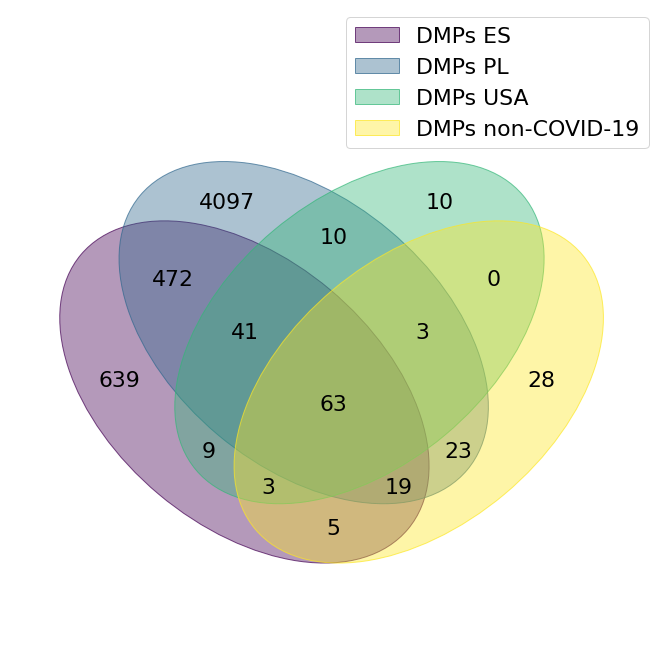

In [20]:
fig = venn(
    {"DMPs ES": spain, "DMPs PL": pl, "DMPs USA": usa, "DMPs non-COVID-19": report},
    figsize=(12, 12),
    fontsize=22,
)

fig

In [ ]:
fig.figure.savefig("../Plots/VennAllCoVGroupsAndNonCov.jpg")